<a href="https://colab.research.google.com/github/KumudaBG/DeepLearning-Assignment3/blob/main/a1_numpy_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

## Colab environment

In [ ]:
!python --version

Python 3.7.10


In [ ]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [ ]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


In [ ]:
!nvidia-smi

# It's okay to run this notebook without a GPU!

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### 3-dimensional inputs , 2-D output

In [ ]:
import numpy as np

n = 270
d = 3
x = np.random.uniform(-1, 1, (n,d))
weights_true = np.array([[5,1,2],[2,2,1]]).T
bias_true= np.array([2,1])
y_true = (x**2) @ weights_true+ x @ weights_true + bias_true
print(f'y: {y_true.shape}')
print(y_true)


y: (270, 2)
[[ 1.39152506e+01  5.98555699e+00]
 [ 8.44052686e-01  5.50844059e-01]
 [ 1.66397814e+00  2.86482413e+00]
 [ 1.74178634e+00  2.30025469e+00]
 [ 4.12061446e+00  4.74126394e+00]
 [ 1.02195390e+01  5.45684590e+00]
 [ 7.92025978e+00  3.82389367e+00]
 [ 6.78727563e+00  2.86076913e+00]
 [ 2.82157528e+00  3.74705462e+00]
 [ 3.09146043e+00  1.04074026e+00]
 [ 1.13463801e+00  2.39448422e-01]
 [ 4.56258297e+00  1.63948642e+00]
 [ 1.84348555e+00  1.90639769e+00]
 [ 5.58944905e+00  2.32309228e+00]
 [ 6.07845896e-01  8.93191450e-01]
 [ 1.60488499e+00  1.23581398e+00]
 [ 3.90694111e+00  3.02404316e+00]
 [ 4.53940564e+00  2.29579748e+00]
 [ 1.08084577e+01  4.64944426e+00]
 [ 8.47074297e-01  7.72977864e-01]
 [ 4.92715862e+00  2.91159154e+00]
 [ 4.14541932e-01  2.84558167e-01]
 [ 6.63229789e+00  3.42516097e+00]
 [ 4.95043397e+00  3.20848558e+00]
 [ 8.16400809e+00  4.75890494e+00]
 [ 1.17571837e+01  4.77860536e+00]
 [ 8.06862932e+00  3.09787546e+00]
 [ 1.17612220e+01  6.51048598e+00]
 [ 7.017

#Visualization

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.manifold import TSNE
def plot_3d(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()


In [ ]:
import plotly.graph_objects as pltgo
def plot_go_3d(x, y, y_pred=None):
  
  fig = pltgo.Figure()
  fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y.reshape([-1]),
                    name='y_true', mode='markers', marker=dict( size=10, color='dodgerblue', colorscale='Viridis', opacity=0.5)))
  if y_pred is not None:
    fig.add_trace(pltgo.Scatter3d(x = x[:,0], y = x[:,1], z = y_pred.reshape([-1]),
                   name='y_pred', mode='markers', marker=dict( size=10, color='goldenrod', colorscale='Viridis', opacity=0.5)))
  fig.update_layout(margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [ ]:
X = TSNE(n_components=2).fit_transform(x)
Y = TSNE(n_components=1).fit_transform(y_true)
plot_go_3d(X,Y)

#MSE -Mean Square Error

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient

#Linear Model

In [ ]:
class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 8):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = (x**2)@self.weights + x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

#Relu Activation Function

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


#3D neural network model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden=8):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu = Relu()
    self.linear2 = Linear(num_hidden,num_hidden)
    self.linear3 = Linear(num_hidden,2)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r = self.relu(l1)
    l2 = self.linear2(r)
    r = self.relu(l2)
    l3 = self.linear3(r)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu_gradient = self.relu.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu_gradient)
    relu_gradient = self.relu.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)
    self.linear3.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)

array([[ 1.02715749e+01,  8.20771768e+00,  8.69109034e+00],
       [-1.75212553e-02, -1.16041880e-02,  9.84248737e-03],
       [ 2.61182689e-02,  9.11346971e-01,  8.06425953e-01],
       [ 7.83603918e-02,  2.88827946e-01,  2.65549656e-01],
       [-6.75969912e-01,  8.98855539e+00,  7.82086648e+00],
       [ 4.23262138e+00,  5.31563129e+00,  5.29091086e+00],
       [ 1.39195614e+00,  1.26583001e+00,  1.31302937e+00],
       [ 1.06129655e+00,  7.33335445e-01,  7.96954084e-01],
       [-1.93196224e-01,  3.32400282e+00,  2.90026747e+00],
       [ 3.60700336e-02,  2.75563417e-02,  6.98844475e-02],
       [ 1.66091798e-02,  7.93235772e-04, -1.67004323e-03],
       [ 1.72853512e-01,  2.05386338e-01,  2.11353053e-01],
       [ 7.41446051e-02,  1.34722864e-01,  1.29214858e-01],
       [ 3.51180771e-01,  4.38896242e-01,  4.46297178e-01],
       [ 3.52680996e-02,  2.08331003e-02,  5.69051154e-03],
       [ 3.65732675e-03, -5.06071738e-03, -1.60513177e-02],
       [ 5.63973902e-01,  1.51213385e+00

#Model Fit 

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

In [ ]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

1367.695722426716
159308927772.4883


Epoch 0, loss 159308927772.4883
Epoch 1, loss 7.390381029029145e+37
Epoch 2, loss 7.496335847147753e+35
Epoch 3, loss 4.797654942174574e+35
Epoch 4, loss 3.0704991629917242e+35
Epoch 5, loss 1.9651194643147036e+35
Epoch 6, loss 1.2576764571614098e+35
Epoch 7, loss 8.049129325833019e+34
Epoch 8, loss 5.151442768533135e+34
Epoch 9, loss 3.2969233718612132e+34
Epoch 10, loss 2.1100309579911805e+34
Epoch 11, loss 1.350419813114358e+34
Epoch 12, loss 8.642686803931904e+33
Epoch 13, loss 5.531319554516401e+33
Epoch 14, loss 3.540044514890501e+33
Epoch 15, loss 2.265628489529917e+33
Epoch 16, loss 1.45000223329915e+33
Epoch 17, loss 9.28001429311454e+32
Epoch 18, loss 5.939209147593302e+32
Epoch 19, loss 3.8010938544597206e+32
Epoch 20, loss 2.4327000668542165e+32
Epoch 21, loss 1.556928042786699e+32
Epoch 22, loss 9.964339473834879e+31
Epoch 23, loss 6.377177263254338e+31
Epoch 24, loss 4.0813934484827755e+31
Epoch 25, loss 2.6120918070289693e+31
Epoch 26, loss 1.6717387564985428e+31
Epoch 2

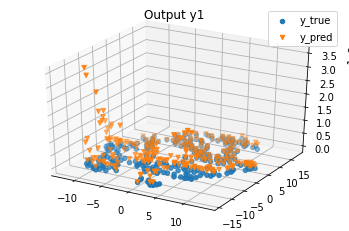

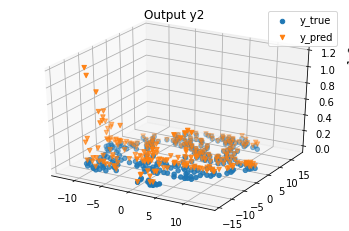

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=40)
plot_3d('Output y1', x, y_true[:,0], y_pred[:,0])
plot_3d('Output y2', x, y_true[:,1], y_pred[:,1])

In [ ]:
X_plot = TSNE(n_components=2).fit_transform(x)
y_true_plot = TSNE(n_components=1).fit_transform(y_true)
y_pred_plot = TSNE(n_components=1).fit_transform(y_pred)
plot_go_3d(X_plot,y_true_plot,y_pred_plot)